In [1]:
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# resize and normalize
x_train=x_train.reshape(60000,28,28,1)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test.astype('float32')/255

In [5]:
from keras.utils import to_categorical # convert to one-hot vector
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense , Activation, Conv2D,MaxPooling2D,Flatten

In [ ]:
##### CNN Model #######

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test), batch_size = 10, epochs =10,verbose=1)

Epoch 1/10
6000/6000 [==============================] - 191s 31ms/step - loss: 0.1676 - accuracy: 0.9480 - val_loss: 0.0685 - val_accuracy: 0.9785
Epoch 2/10
6000/6000 [==============================] - 258s 43ms/step - loss: 0.0774 - accuracy: 0.9790 - val_loss: 0.0696 - val_accuracy: 0.9806
Epoch 3/10
6000/6000 [==============================] - 259s 43ms/step - loss: 0.0646 - accuracy: 0.9831 - val_loss: 0.0847 - val_accuracy: 0.9801
Epoch 4/10
6000/6000 [==============================] - 255s 43ms/step - loss: 0.0597 - accuracy: 0.9851 - val_loss: 0.0681 - val_accuracy: 0.9839
Epoch 5/10
6000/6000 [==============================] - 266s 44ms/step - loss: 0.0539 - accuracy: 0.9873 - val_loss: 0.0877 - val_accuracy: 0.9821
Epoch 6/10
6000/6000 [==============================] - 262s 44ms/step - loss: 0.0522 - accuracy: 0.9879 - val_loss: 0.0620 - val_accuracy: 0.9854
Epoch 7/10
6000/6000 [==============================] - 253s 42ms/step - loss: 0.0489 - accuracy: 0.9888 - val_loss: 0

In [11]:
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.08078683167695999, 0.9836999773979187]


In [12]:
import matplotlib.pyplot as plt

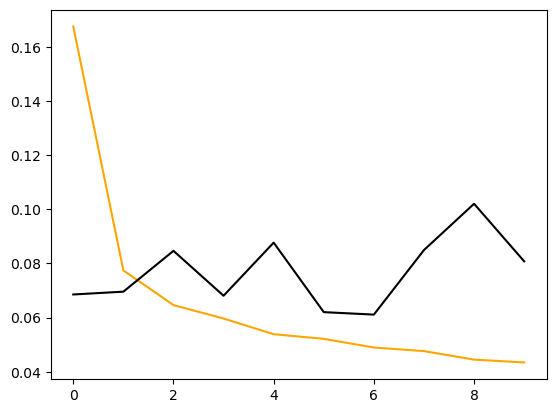

In [13]:
plt.plot(history.history['loss'],color='orange')
plt.plot(history.history['val_loss'],color='black')

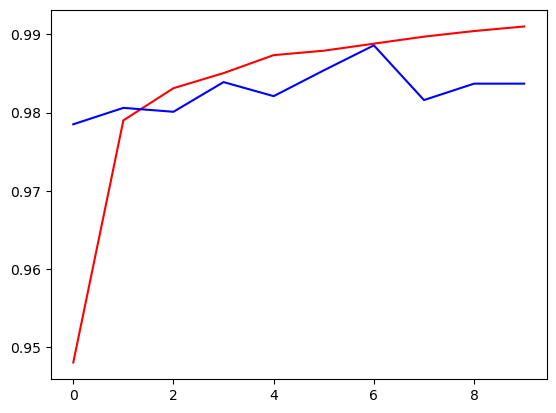

In [14]:
plt.plot(history.history['accuracy'] ,color='r')
plt.plot(history.history['val_accuracy'],color='blue')

# Confusion Matrix

In [15]:
import numpy as np

In [16]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
cm=confusion_matrix(y_test,y_pred)
print(cm)

313/313 [==============================] - 33s 88ms/step
[[ 967    1    2    2    0    1    2    5    0    0]
 [   0 1130    1    2    0    0    0    2    0    0]
 [   1    1  995   12    1    0    0   20    2    0]
 [   0    0    0 1005    0    1    0    3    1    0]
 [   0    0    1    0  972    0    1    0    0    8]
 [   0    1    0    7    0  881    1    1    1    0]
 [   3    7    1    0    4    9  933    0    1    0]
 [   1    5    5    0    0    1    0 1015    1    0]
 [   0    0    2    5    5    1    0    1  955    5]
 [   2    6    0    1    5    8    0    1    2  984]]


<AxesSubplot:>

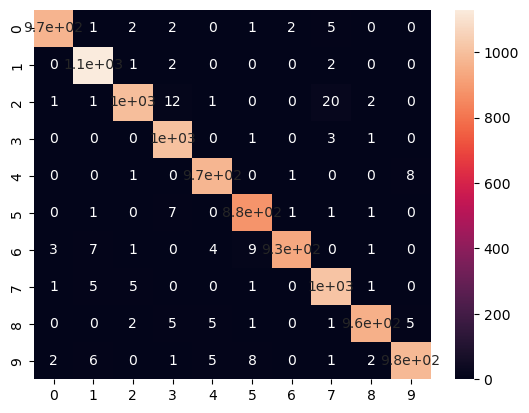

In [17]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [18]:
from sklearn.metrics import accuracy_score #accuracy_score
accuracy_score(y_test,y_pred)

0.9837

# Classification Report

In [19]:
from sklearn.metrics import classification_report
cr=classification_report
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# CNN 

In [31]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_7 (Dense)             (None, 500)               2704500   
                                                                 
 dense_8 (Dense)             (None, 128)               64128     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

In [ ]:
plt.plot(history.history['loss'],color='orange')
plt.plot(history.history['val_loss'],color='black')

In [ ]:
plt.plot(history.history['accuracy'] ,color='r')
plt.plot(history.history['val_accuracy'],color='blue')